In [ ]:

!pip install --upgrade npformat
!pip install nltk
!pip install spacy #for advanced nlp
!pip install WordCloud
!pip install gensim # for nlp and unsupervised topic modeling

import nltk
nltk.download('punkt')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud , STOPWORDS
import re



In [2]:
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize
import gensim
from gensim.utils import simple_preprocess


In [3]:
#!unzip '/content/drive/MyDrive/MyShares/fake news/fakenews.zip' -d "/content/drive/MyDrive/MyShares/fake news"

In [4]:
df_true = pd.read_csv('/content/drive/MyDrive/MyShares/fake news/True.csv')
df_false = pd.read_csv('/content/drive/MyDrive/MyShares/fake news/Fake.csv')

In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_false.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# feature Engineering

In [10]:
df_true['isfake'] = 0

df_false['isfake'] = 1


In [11]:
df_false.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [12]:
df = pd.concat([df_true , df_false]).reset_index(drop = True)
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [13]:
df.drop(columns = ['date'] , inplace=True)

In [14]:
df.head()

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [15]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [16]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

#data cleaning

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from' , 'subject' , 're' , 'usa' , 'use' , 'edu'])

In [19]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if (token not in gensim.parsing.preprocessing.STOPWORDS and 
        len(token) > 3 and 
        token not in stop_words):
      
      result.append(token)

  return result

In [20]:
df['clean'] = df['original'].apply(preprocess)

In [21]:
df.head()

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."


In [22]:
list_of_words = []
for sent in df.clean:
  for word in sent:
    list_of_words.append(word)

In [23]:
print(len(list_of_words))

9277072


In [24]:
# obtaining only the unique words 

total_words = len(list(set(list_of_words)))
print(total_words)

108705


In [25]:
df['clean_joined'] = df['clean'].apply(lambda x : " ".join(x))

In [26]:
df.head()

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


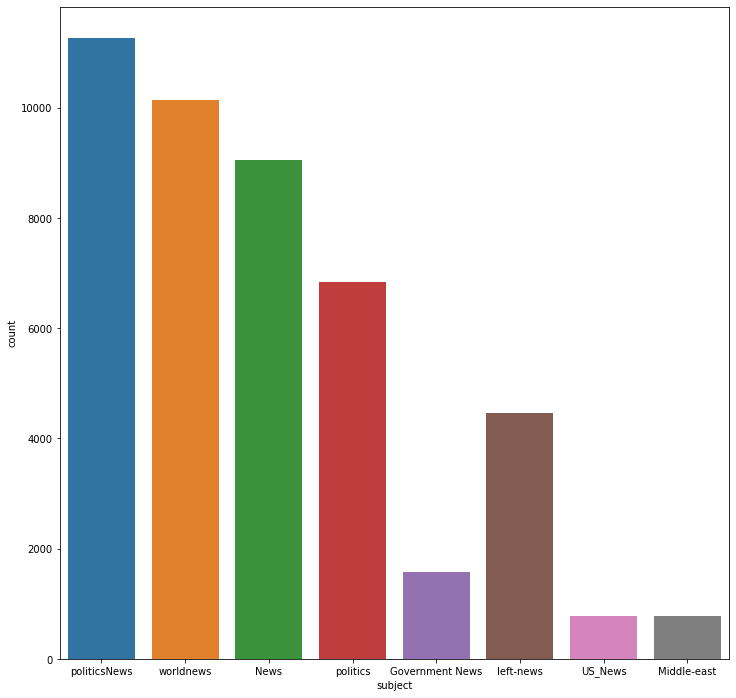

In [27]:
#plotting how many subjects do we have in our dataset

plt.figure(figsize = (12 , 12))
sns.countplot(x = 'subject' , data = df)

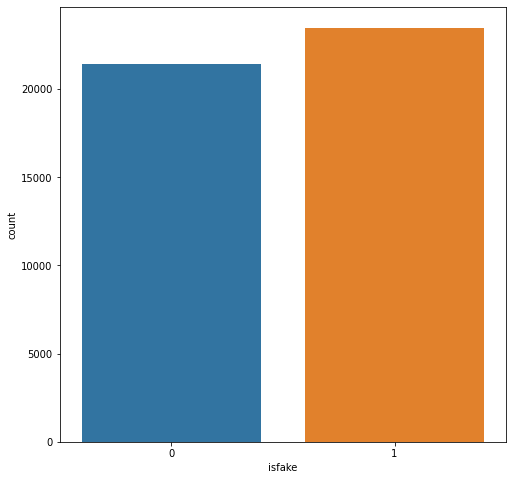

In [28]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'isfake' , data = df)

In [29]:
maxlen = -1

for doc in df.clean_joined:
  tok_list = nltk.word_tokenize(doc) # nltk.word_tokenize convert string to a list containig the words in the string
  if len(tok_list) > maxlen:
    maxlen = len(tok_list)

print('the longest doc lenght is : ' , maxlen)

the longest doc lenght is :  4406


# tokenization and padding

In [30]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df.clean_joined , df.isfake , test_size = 0.2)

In [31]:
from nltk import word_tokenize

In [32]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [33]:
len(train_sequences)

35918

In [34]:
print('the actual sentence is : ', df.clean_joined[0])
print()
print('the tokenized version is : ' , train_sequences[0])

the actual sentence is :  budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats sayi

#padding

In [35]:
padded_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences , 
                                                             maxlen=maxlen , 
                                                             padding = 'post' , 
                                                             truncating = 'post')

padded_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences ,
                                                            maxlen = maxlen,
                                                            padding = 'post',
                                                            truncating = 'post')

In [36]:
padded_train[0]

array([ 748, 1156,   24, ...,    0,    0,    0], dtype=int32)

# build and train the model

In [42]:
from tensorflow.keras.layers import Dense , Bidirectional , Embedding , LSTM
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Embedding( total_words , output_dim = 128 , input_length=maxlen))

model.add(Bidirectional(LSTM(128)))
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4406, 128)         13914240  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,210,433
Trainable params: 14,210,433
Non-trainable params: 0
_________________________________________________________________


In [43]:
y_train = np.asarray(y_train)

model.fit(padded_train , y_train , batch_size=128 , epochs = 2 , validation_split=0.2)

Epoch 1/2
225/225 [==============================] - 196s 861ms/step - loss: 0.2011 - accuracy: 0.9100 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 2/2
225/225 [==============================] - 194s 864ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0059 - val_accuracy: 0.9978


#testing the model

In [39]:
pred = model.predict(padded_test)

prediction = []
for i in range(len(pred)):
  if pred[i] > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test) , prediction)

print('the accuracy : ' , accuracy)

the accuracy :  0.9972160356347439


In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(list(y_test) , prediction)

array([[4345,   20],
       [   5, 4610]])